### CH 2. 지도학습

#### 2.1 분류와 회귀

지도 학습에는 **분류**와 **회귀**가 있다.

**(Classification)** 분류는 미리 정의된, 가능성 있는 여러 **클래스 레이블** 중 하나를 예측하는 것이다
두 개의 클래스로 분류하는 **이진 분류**와 셋 이상의 클래스로 분류하는 **다중 분류**로 나뉜다.
이진 분류는 질문의 답이 예/아니오만 나올 수 있도록 하는 것이고(양성, 음성)
다중 분류는 붓꽃 분석이나 미리 만들어놓은 언어 목록의 클래스를 말한다.

**(Regression)** 회귀는 연속적인 **숫자**, 또는 프로그래밍 용어로 **부동소수점수**(실수)를 예측하는 것이다.
어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것이 회귀 문제의 한 예다.
예측된 값은 어떤 양으로서, 일정 범위 안의 어떤 숫자도 될 수 있다. 수확량, 인원수 등 어떤 숫자든 회귀 문제로 사용된다.

출력 값에 연속성이 있는지 보면 회귀와 분류 문제를 쉽게 구분할 수 있다. 예상 출력 값 사이에 연속성이 있다면 회귀 문제이다.
<br>
<br>
<br>
<br>
<br>
<br>

#### 2.2 일반화, 과대적합, 과소적합

모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 **일반화**되었다고 한다.<br>
즉, 모델을 만들 때는 가능한 한 정확하게 일반화되도록 해야 한다.

가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 **과대 적합**이라고 한다. <br>
과대적합은 모델이 훈련세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어난다.

반대로 너무 간단한 모델이 선택되는 것을 **과소 적합**이라고 한다.<br>
모델이 너무 간단하면 데이터의 다양성을 잡아내지 못하고 훈련 세트에도 잘 맞지 않을 것이다. 

<u>그러므로 우리는 일반화 성능이 최대가 되는 최적점을 찾아야 한다.</u>
![일반화](./img/일반화.png)
<br>
<br>
<br>
<br>
<br>
<br>

### 2.3 지도 학습 알고리즘

### 2.3.1 예제에서 사용할 데이터셋들
두 개의 특성을 가진 **forge 데이터셋**은 인위적으로 만든 이진 분류 데이터셋이다.

C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarnin

X.shape: (26, 2)


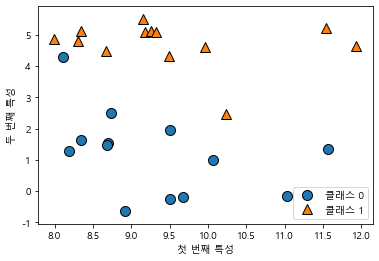

In [4]:
import mglearn
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# 데이터셋을 만든다.
X, y = mglearn.datasets.make_forge()

# 산점도를 그린다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

<br>
<br>
<br>
<br>
<br>
<br>

Text(0, 0.5, '타깃')

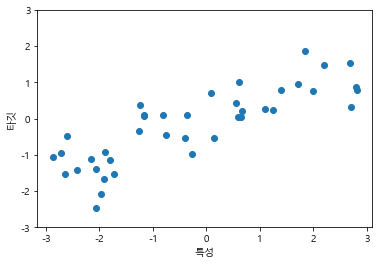

In [5]:
# wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수를 가진다.
# 특성을 x 축에 놓고 회귀의 타깃을 y 축에 놓았다.

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

<br>
<br>
<br>
<br>
<br>
<br>

#### 실제 데이터셋: 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋

In [6]:
# 각 종양은 양성(해롭지 않은 종양)과 악성(암 종양)으로 레이블되어 있고, 조직 데이터를 기반으로 종양이 악성인지 예측 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():",cancer.keys())

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
# 이 데이터셋은 569개의 데이터 포인트를 가지고 있고 특성은 30개이다.
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [8]:
# 569개 데이터 포인트 중 212개는 악성이고 357개는 양성이다.
# bincount 는 각 원소에 대한 갯수를 구한다.
import numpy as np
print("클래스별 샘플 개수:", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수: {'malignant': 212, 'benign': 357}


In [9]:
# 각 특성의 의미는 다음과 같다.
print("특성 이름:", cancer.feature_names)

특성 이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<br>
<br>
<br>
<br>
<br>
<br>

#### 실제 데이터셋: 범죄율, 인접도, 고속도로 접근성 등의 정보를 이용해 주택 가격을 예측하는 보스턴 주택가격 데이터셋

In [10]:
# 이 데이터셋에는 데이터 포인트 506개와 특성 13개가 있다.
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


In [11]:
# 이 데이터셋에서 13개의 특성뿐만 아니라 특성끼리 곱하여 확장을 해본다.
# 이처럼 특성을 유도해내는 것을 특성 공학이라고 한다.
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


<br>
<br>
<br>
<br>
<br>
<br>

### 2.3.2 K-NN 알고리즘(K-Nearest Neighbors)

새로운 데이터 포인트에 대해 예측할 때 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 이웃을 찾는다.

#### KNN 분류

C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


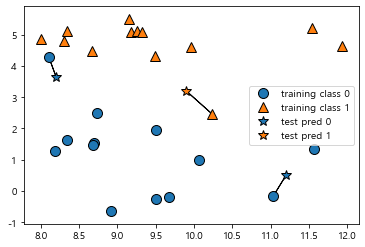

In [12]:
# forge 데이터셋에 대한 1-nn 모델의 예측
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


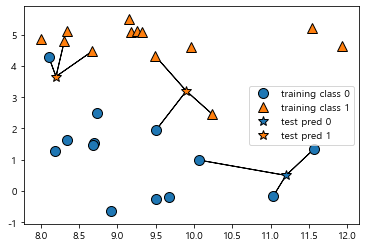

In [13]:
# k는 임의로 선택할 수 있다.
mglearn.plots.plot_knn_classification(n_neighbors=3)

<br>
<br>
<br>
<br>
<br>
<br>

In [14]:
# scikit-learn 을 사용해서 knn 알고리즘을 적용해본다.
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [15]:
# 다음은 KNeighborsClassifier를 import하고 객체를 만든다.
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
# 훈련 세트로 모델을 학습시킨다.
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
# 테스트 데이터에 대해 predict 메서드를 호출해 예측한다.
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [18]:
# 모델이 얼마나 잘 일반화되었는지 평가하기 위해 score 메서드로 확인한다.
print("테스트 세트 정확도:", clf.score(X_test, y_test))

테스트 세트 정확도: 0.8571428571428571


<br>
<br>
<br>
<br>
<br>
<br>

#### KNeighborsClassifier 분석

2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy 평면에 그려볼 수 있다.
그리고 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠한다.

이렇게 하면 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 **결정 경계**를 볼 수 있다.

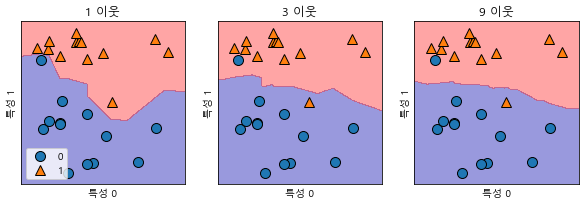

In [19]:
# 다음은 이웃이 1, 3, 9개 일 때의 결정 경계를 보여준다.
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환한다.
    # 그래서 객체 생성과 fit 메서드는 한 줄에 쓸 수 있다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(str(n_neighbors) + " 이웃")
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

그림을 보면 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있고, 
이웃의 수를 늘릴수록 결정 경계가 더 부드러워진다.<br> 부드러운 경계는 더 단순한 모델을 의미한다.

<u>즉, 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아진다</u>
<br>
<br>
<br>
<br>
<br>
<br>

#### 실제 데이터인 유방암 데이터셋을 사용해보겠다.

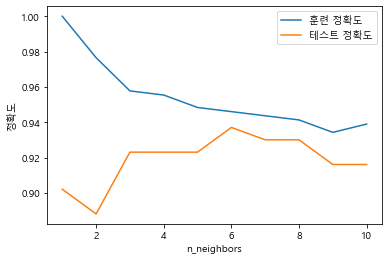

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy, test_accuracy = [], []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 테스트 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.xlabel("n_neighbors")
plt.ylabel("정확도")
plt.legend()

이 그림은 n_neighbors 수(x 축) 에 따른 훈련 세트와 테스트 세트 정확도(y 축) 을 보여준다.<br>
여기서 과대적합과 과소적합의 특징을 볼 수 있다.

이웃의 수가 하나일 때는 훈련 데이터에 대해 예측이 완벽하지만 이웃의 수가 늘어날수록 모델은 단순해지고 정확도는 줄어든다.<br>
테스트 세트는 반대로 하나 사용한 정확도가 이웃을 많이 사용했을 때보다 낮다.

이것은 k-nn 이웃이 하나일 때는 모델을 너무 복잡하게 만든다는 것을 알 수 있다.<br>
반대로 이웃을 많이 사용했을 때는 모델이 너무 단순해서 정확도는 더 나빠진다.

정확도가 가장 좋을 때는 중간 정도인 6개를 사용한 경우이므로 일반화되는 k를 찾아야한다.
<br>
<br>
<br>
<br>
<br>
<br>

#### KNN 회귀

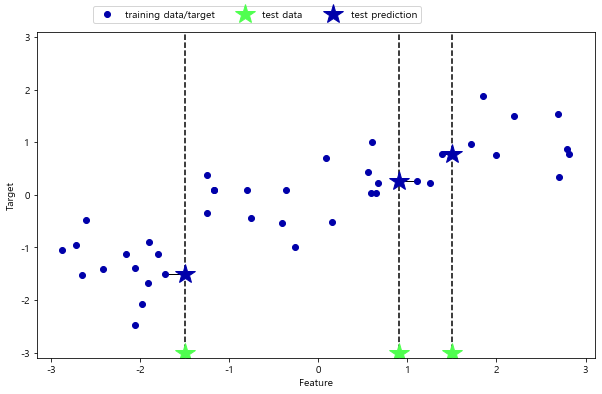

In [21]:
# wave 데이터셋을 이용해서 이웃이 하나인 knn 을 해보겠다.
mglearn.plots.plot_knn_regression(n_neighbors=1)

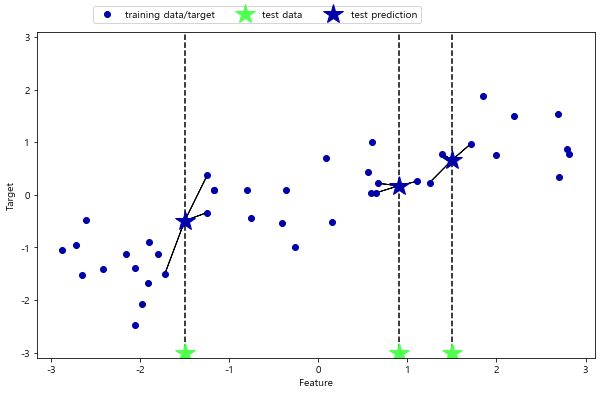

In [22]:
# k가 2 이상일 때는 이웃 간의 평균이 예측이 된다.
mglearn.plots.plot_knn_regression(n_neighbors=3)

<br>
<br>
<br>
<br>
<br>
<br>

In [23]:
# scikit-learn 에서 회귀를 위한 knn 알고리즘은 KNeighborsRegressor에 구현되어 있다.
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [24]:
# 테스트 세트에 대해 예측
print("테스트 세트 예측:", reg.predict(X_test))

테스트 세트 예측: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


회귀일 땐 R<sup>2</sup> 값을 반환한다.<br>
결정 계수라고도 하는 R<sup>2</sup> 값은 회귀 모델에서 예측 적합도를 0과 1사이의 값으로 계산한 것이다.

In [25]:
print("테스트 세트 R^2:", reg.score(X_test, y_test))

테스트 세트 R^2: 0.8344172446249604


<br>
<br>
<br>
<br>
<br>
<br>

#### KNeighborsRegressor 분석

1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해볼 수 있다.

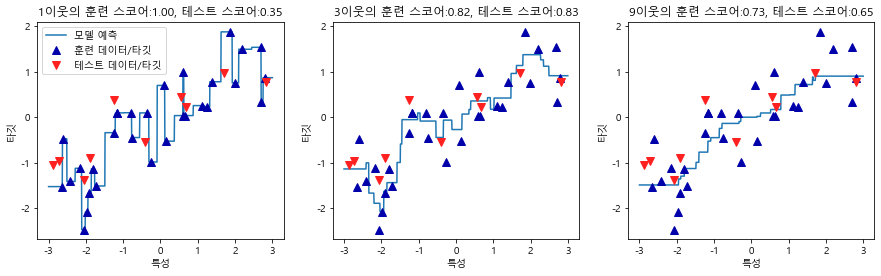

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1000개의 데이터 포인트를 만든다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 한다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(str(n_neighbors) + "이웃의 훈련 스코어:" + str(format(reg.score(X_train, y_train),".2f")) + ", 테스트 스코어:" + str(format(reg.score(X_test,y_test), ".2f")))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나간다.

이는 매우 불안정한 예측을 만들어 낸다. 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측을 한다.
<br>
<br>
<br>
<br>
<br>
<br>

#### 장단점과 매개변수

일반적으로 KNeighbors 분류기에 중요한 매개변수는 두 개이다. 데이터 포인트 사이의 거리는 재는 방법과 이웃의 수다.

**k-NN의 장점**
- 이해하기 매우 쉬운 모델
- 많이 조정하지 않아도 좋은 성능을 발휘
- 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점

**k-NN의 단점**
- 훈련 세트가 매우 크면 예측이 느림
- 많은 특성을 처리하는 능력이 부족함

<u>이런 단점이 없는 알고리즘이 다음에 설명할 선형 모델이다.</u>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### 2.3.3 선형모델
: 선형 모델은 입력 특성에 대한 **선형 함수**를 만들어 예측한다.

#### 회귀의 선형 모델
y^ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

이 식에서 x[0] 부터 x[p] 까지는 하나의 데이터 포인트에 대한 특성을 나타내며(특성의 개수는 p + 1),<br>
w와 b는 모델이 학습할 파라미터이다. 그래고 y^ 은 모델이 만들어낸 예측값이다.

w[0]: 0.393906  b: -0.031804


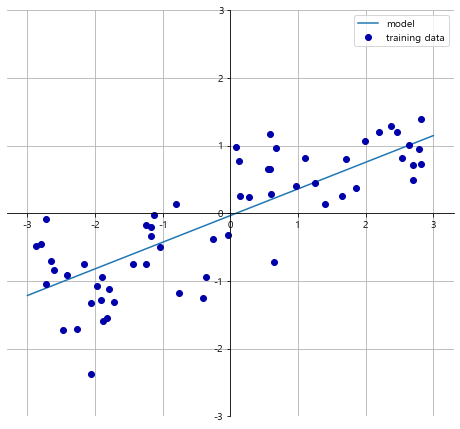

In [27]:
# 1차원 wave 데이터셋으로 파라미터 w[0]와 b를 직선처럼 되도록 학습시켜본다.
mglearn.plots.plot_linear_regression_wave()

회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원(특성이 많음)에서는 초평면이 된다.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### 선형 회귀(최소제곱법)
: 가장 간단하고 오래된 회귀용 선형 알고리즘이다.

선형 회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 **평균제곱오차**를 최소화하는 파라미터 w와 b를 찾는다.<br>
평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것이다.

선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없다.

In [28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [29]:
# 기울기 파라미터(w)는 가중치 또는 계수라 하며 lr 객체의 coef_ 속성에 저장되어 있고 
# 편향 또는 절편 파라미터(b)는 intercept_ 속성에 저장되어 있다.
print("lr.coef_:", lr.coef_)
print("lr.intercept:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept: -0.031804343026759746


intercept_ 속성은 항상 실수값 하나지만, coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열이다.<br>
wave 데이터셋에는 입력 특성이 하나뿐이므로 lr.coef_도 원소를 하나만 가지고 있다.

In [30]:
# 훈련 세트와 테스트 세트의 성능을 확인해보겠다.
print("훈련 세트 점수:", lr.score(X_train, y_train))
print("테스트 세트 점수:", lr.score(X_test, y_test))

훈련 세트 점수: 0.6700890315075756
테스트 세트 점수: 0.65933685968637


훈련 세트와 테스트 세트 점수가 비슷한 것으로 보아 과소적합인 것을 알 수 있다.

1차원 데이터셋에서는 모델이 단순하므로 과대적합을 걱정할 필요가 없으나<br>
고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높다.
<br>
<br>
<br>
<br>
<br>
<br>

In [31]:
# LinearRegression 모델이 보스턴 주택가격 데이터셋 같은 복잡한 데이터셋에서는 어떻게 작동되는지 본다.

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
# 훈련 세트와 테스트 세트의 점수를 비교해보면 훈련 세트에서는 예측이 매우 정확한 반면 테스트 세트에서는 낮은 것을 볼 수 있다.
print("훈련 세트 점수:", lr.score(X_train, y_train))
print("테스트 세트 점수:", lr.score(X_test, y_test))

훈련 세트 점수: 0.952051960903273
테스트 세트 점수: 0.6074721959665708


이런 성능 차이는 모델이 과대적합되었다는 확실한 의미이므로 복잡도를 제어할 수 있는 모델을 사용해야 한다.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### 릿지 회귀(Ridge)
: 릿지 회귀에서 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다.<br>
가중치의 절댓값을 가능한 한 작게 만드는 것이다. 다시 말해서 w의 모든 원소가 0에 가깝게 되길 원한다.

이는 모든 특성이 출력에 주는 영향을 최소한으로 만든다. 이런 제약을 **규제**라고 한다.<br>
규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이다. 릿지 회귀에서 사용하는 규제 방식을 L2 규제라고 한다.

In [33]:
# 릿지 회귀는 linear_model.Ridge에 구현되어 있다.
# 릿지 회귀가 확장된 보스턴 주택가격 데이터셋에 어떻게 적용되는지 본다.
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수:", ridge.score(X_train, y_train))
print("테스트 세트 점수:", ridge.score(X_test, y_test))

훈련 세트 점수: 0.885796658517094
테스트 세트 점수: 0.7527683481744755


결과를 확인해보니 LinearRegression 보다 훈련 세트 점수는 낮아졌지만 테스트 세트 점수는 더 높아졌다.<br>
과대적합이 줄어들었음을 확인할 수 있다. 모델의 복잡도가 낮아지면 훈련 세트의 성능은 떨어지지만 더 일반화된 모델이 된다.
<br>
<br>
<br>
<br>
<br>
<br>
Ridge 에서 **alpha 매개변수**를 사용해 모델을 얼마나 단순화할지를 지정할 수 있다.
앞 예제에서는 기본값인 alpha=1.0을 사용했다.

In [34]:
# alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 준다.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수:", ridge10.score(X_train, y_train))
print("테스트 세트 점수:", ridge10.score(X_test, y_test))

훈련 세트 점수: 0.7882787115369614
테스트 세트 점수: 0.635941148917731


<br>
<br>
<br>
<br>

In [35]:
# alpha 값을 줄이면 계수에 대한 제약이 그만큼 풀리게 되면서 점점 과대적합이 된다.
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
print("훈련 세트 점수:", ridge0001.score(X_train, y_train))
print("테스트 세트 점수:", ridge0001.score(X_test, y_test))

훈련 세트 점수: 0.9506664850754095
테스트 세트 점수: 0.6304288410863274


In [36]:
# alpha = 0.1 일 때가 10과 0.001 보다 일반화된 것을 알 수 있다.
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수:", ridge01.score(X_train, y_train))
print("테스트 세트 점수:", ridge01.score(X_test, y_test))

훈련 세트 점수: 0.9282273685001985
테스트 세트 점수: 0.772206793647982


<br>
<br>
<br>
<br>
<br>
<br>
또한 alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 보면 alpha 매개변수가 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있다.

높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_ 의 절댓값 크기가 작을 것이라고 예상할 수 있다

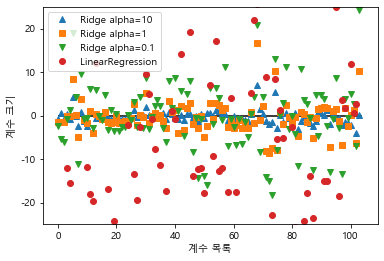

In [37]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

그림에서 x 축은 coef_의 원소를 위치대로 나열한 것이다. y 축은 각 계수의 수치를 나타낸다.

alpha=10일 때 대부분의 계수는 -3과 3 사이에 위치하고<br>
alpha=1 일 때 모델의 계수는 조금 더 커졌다.<br>
alpha=0.1일 때 계수는 더 커지며<br>
alpha=0인 선형 회귀의 계수는 더 커져 그림 밖으로 넘어간다.
<br>
<br>
<br>
<br>
<br>
<br>

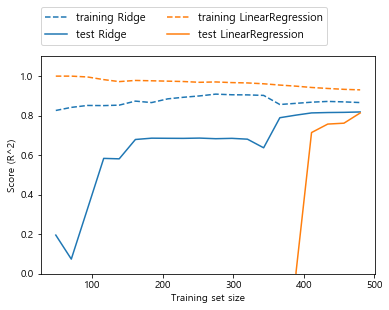

In [38]:
# 규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것이다.
mglearn.plots.plot_ridge_n_samples()

Ridge 에는 규제가 적용되므로 훈련 점수가 전체적으로 선형 회귀의 훈련 점수보다 낮다.

그러나 테스트 점수에서는 릿지의 점수가 더 높으며 특히 작은 데이터에서 더 그렇다.<br>
데이터셋 크기가 400미만에서는 선형 회귀는 어떤 것도 학습하지 못한다.

데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아질 것이다.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### 라쏘(Lasso)
: 선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있다. 릿지 회귀와 같이 라쏘도 계수를 0에 가깝게 만들려고 한다.<br>
하지만 방식이 조금 다르며 이를 L1 규제라고 한다. 결과로 라쏘를 사용할 때 어떤 계수는 정말 0이 된다.<br>
일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내준다.

In [39]:
# 확장된 보스턴 주택가격 데이터셋에 라쏘를 적용해보겠다.
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수:", lasso.score(X_train, y_train))
print("테스트 세트 점수:", lasso.score(X_test, y_test))
print("사용한 특성의 수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29323768991114607
테스트 세트 점수: 0.20937503255272294
사용한 특성의 수: 4


Lasso 는 훈련 세트와 테스트 세트 모두 결과가 좋지 않다.<br>
이는 과소적합이며 105개의 특성 중 4개만 사용한 것을 볼 수 있다.
<br>
<br>
<br>
<br>
<br>
Lasso 도 마찬가지로 계수를 얼마나 강하게 0으로 보낼지를 조절하는 alpha 매개변수가 있다.

In [40]:
# 과소적합을 줄이기 위해 alpha 값을 줄여보겠다. 이렇게 하려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 한다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수:", lasso001.score(X_train, y_train))
print("테스트 세트 점수:", lasso001.score(X_test, y_test))
print("사용한 특성의 수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.8962226511086497
테스트 세트 점수: 0.7656571174549983
사용한 특성의 수: 33


alpha 값을 낮추면 모델의 복잡도는 증가하여 성능이 좋아진다.<br>
<br>
<br>
<br>
<br>
<br>
그러나 alpha 값을 너무 낮추면 규제의 효과가 없어서 과대적합이 되므로 LinearRegression의 결과와 비슷해진다.

In [41]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수:", lasso00001.score(X_train, y_train))
print("테스트 세트 점수:", lasso00001.score(X_test, y_test))
print("사용한 특성의 수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.9507158754515467
테스트 세트 점수: 0.6437467421272709
사용한 특성의 수: 96


<br>
<br>
<br>
<br>
<br>
<br>
릿지 회귀와 alpha 값이 다른 라쏘 회귀의 계수 크기를 비교해본다.

(-25, 25)

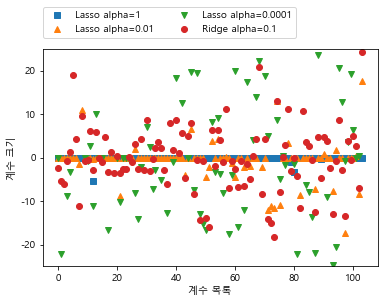

In [42]:
# alpha 값이 다른 모델들의 계수를 그래프로 그려본다.
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)

alpha = 1 일 때는 계수 대부분이 0 일 뿐만 아니라 나머지 계수들도 크기가 작은 것을 알 수 있다.<br>
alpha = 0.01 로 줄이면 대부분의 특성이 0이 되고<br>
alpha = 0.0001 이 되면 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않은 모델을 얻게 된다.

Ridge alpha=0.1 과 Lasso alpha=0.01인 모델은 성능이 비슷하지만 Ridge을 사용하면 어떤 계수도 0이 되지 않는다.<br>
실제로 이 두 모델 중 보통은 릿지 회귀를 선호한다.

하지만 특성이 많고 그 중 일부분만 중요하다면 Lasso 가 더 좋은 선택이다.<br>
또한 분석하기 쉬운 모델을 원한다면 Lasso가 일부 특성만 사용하므로 쉽게 해석할 수 있다.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### 분류용 선형 모델

y^ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0<br>
이 방정식은 선형 회귀와 비슷하다. 하지만 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교한다.

함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고 크면 +1이라고 예측한다.

회귀용 선형 모델에서는 출력 y^가 특성의 선형 함수였지만 분류형 선형 모델에서는 **결정 경계**가 입력의 선형 함수이다.<br>
다른 말로하면 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기이다.

<br>

선형 모델을 학습시키는 알고리즘은 다양한데, 다음의 두 방법으로 구분할 수 있다.
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방법인지

가장 널리 알려진 두 개의 선형 분류 알고리즘은 <br>
linear_model.LogisticRegression에 구현된 **로지스틱 회귀**와 <br>
svm.LinearSVC에 구현된 선형 **서포트 벡터 머신** 이다.

C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


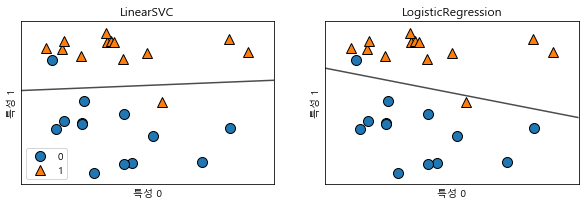

In [43]:
# forge 데이터셋을 사용하여 모델을 만들고 결정 경계를 그림으로 나타내보겠다.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

Ridge 회귀와 마찬가지로 두 모델은 기본적으로 L2 규제를 사용한다.

LogitsticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C 이다.

매개변수로 높은 C 값을 지정하면 선형 모델은 훈련 세트에 가능한 최대로 맞추려 하고, <br>반면에 C 값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만든다.

C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확히 분류하려고 노력할 것이다.
<br>
<br>
<br>
<br>
<br>
<br>

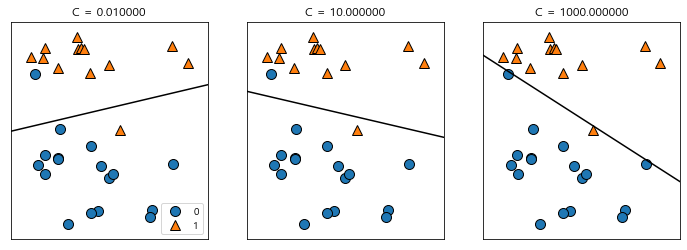

In [44]:
# 각기 다른 C 값으로 만든 선형 SVM 모델의 결정 경계
mglearn.plots.plot_linear_svc_regularization()

C의 값이 커질 수록 포인트를 정확히 분류하려고 애쓰지만 전체 배치에 대해서는 파악하지 못했다.<br>
다시 말해 C의 값이 커질 수록 과대적합이 된다.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
실제 데이터셋을 사용해서 분석해본다.

In [65]:
# 유방암 데이터셋을 사용하여 LogisticRegression을 분석해본다.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=24)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수:", logreg.score(X_train, y_train))
print("테스트 세트 점수:", logreg.score(X_test, y_test))

훈련 세트 점수: 0.9460093896713615
테스트 세트 점수: 0.9230769230769231


C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


기본값 C = 1 으로는 훈련, 테스트 세트 모두 90% 이상의 점수를 내고 있다.<br>
하지만 성능이 매우 비슷하므로 과소적합이다.
<br>
<br>
<br>
<br>


In [66]:
# 모델의 제약을 더 풀어주기 위해 C를 증가시켜 보겠다.
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수:", logreg100.score(X_train, y_train))
print("테스트 세트 점수:", logreg100.score(X_test, y_test))

훈련 세트 점수: 0.9671361502347418
테스트 세트 점수: 0.9370629370629371


C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


c=100을 사용하니 훈련 세트의 정확도가 높아졌고 테스트 세트 정확도도 조금 증가했다.<br>
이는 복잡도가 높은 모델일수록 성능이 좋음을 말해준다.<br>
<br>
<br>
<br>
<br>


In [67]:
# 이번에는 규제를 더 강하게 하기 위해 C=0.01을 사용해본다.
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수:", logreg001.score(X_train, y_train))
print("테스트 세트 점수:", logreg001.score(X_test, y_test))

훈련 세트 점수: 0.9413145539906104
테스트 세트 점수: 0.916083916083916


C:\Users\AHN0\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


이미 c=1 일때 과소적합 모델에서 더 규제가 강해지므로 정확도가 더 낮아진다.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
각기 다른 C값을 사용하여 만든 로지스틱 회귀의 계수

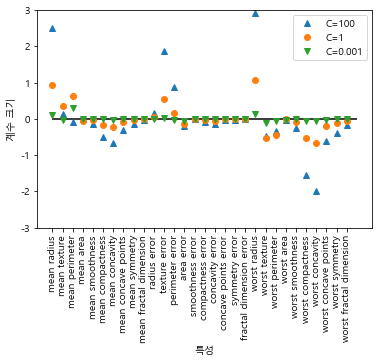

In [70]:
# 규제 매개변수 C 설정을 세 가지로 다르게 하여 모델의 계수를 확인해본다.
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C 가 0.001 일때 가장 계수가 크기가 작은 것을 볼 수 있고<br>
C 가 100일 때 규제가 가장 작은 것을 알 수 있다.
<br>
<br>
<br>
<br>
<br>
<br>
<br>


In [79]:
# 더 이해하기 쉬운 모델을 원한다면 L1 규제를 사용하는 것이 좋다.
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C=", float(C), "인 l1 로지스틱 회귀의 훈련 정확도:", float(lr_l1.score(X_train, y_train)))
    print("C=", float(C), "인 l1 로지스틱 회귀의 테스트 정확도:", float(lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### 다중 클래스 분류용 선형 모델
로지스틱 회귀만 제외하고, 많은 선형 분류 모델은 이진 분류만을 지원한다. 즉, 다중 클래스를 지원하지 않는다.

이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다 방법이다.<br>
각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다.<br>
만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.

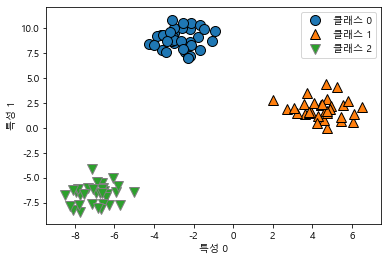

In [80]:
# 세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용해보겠다.
# 이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포를 따른다.

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

<br>
<br>
<br>
<br>
<br>

이 데이터 셋으로 LinearSVC 분류기를 훈련해보겠다.

In [81]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기:", linear_svm.coef_.shape)
print("절편 배열의 크기:", linear_svm.intercept_.shape)

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


coef_ 의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며, 열은 각 특성에 따른 계수 값을 가지고 있다.

intercept_ 는 각 클래스의 절편을 담은 1차원 벡터이다.

<br>
<br>
<br>
<br>
<br>
세 개의 일대다 분류기가 만든 결정 경계

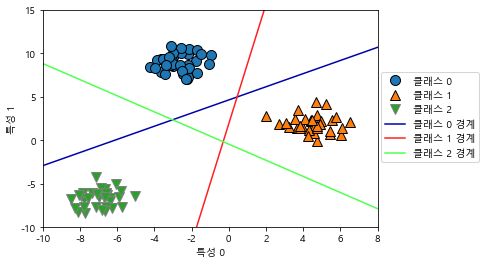

In [83]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

각 클래스 경계에 속한 지역에 따라 클래스가 구분된다.

하지만 중앙에 삼각형 영역은 세 분류기 모두 나머지로 분류했지만 결과가 가장 높은 클래스로 분류된다.<br>
즉, 가장 가까운 직선의 클래스가 될 것이다.

<br>
<br>
<br>
<br>
<br>
<br>

다음은 2차원 평면의 모든 포인트에 대한 예측이다.

Text(0, 0.5, '특성 1')

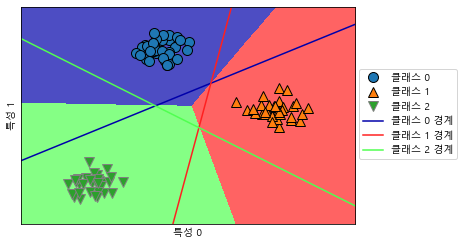

In [84]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### 장단점과 매개변수
선형 모델의 주요 매개변수는 회귀 모델에서는 alpha 였고, LinearSVC와 LogisticRegression에서는 C 다.<br>
alpha 값이 클수록, C 값이 작을수록 모델이 단순해진다.

그리고 L1 규제를 사용할지, L2 규제를 사용할지 정해야 한다.<br>
중요한 특성이 많지 않다고 생각하면 L1 규제, 그렇지 않으면 기본적으로 L2 규제를 사용한다.

**장점**
- 선형 모델은 학습 속도가 빠르고 예측도 빠르다.
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동한다.
- 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다.

**단점**
- 계수의 값들이 왜 그런지 명확하지 않을 때가 있어 계수를 분석하기 어려울 수 있다.
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### 2.3.4 나이브 베이즈 분류기
: 선형 모델과 매우 유사하다. 선형 분류기보다 훈련 속도가 빠른 편이지만, 대신 일반화 성능이 조금 뒤쳐진다.

나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해 파라미터를 학습하고 <br>
각 특성에서 클래스별 통계를 단순하게 취합하기 때문이다.

scikit-learn 에 구현된 나이브 베이즈 분류기는 GaussianNB, BernoullNB, MultinomialNB 세 가지이다.
- GaussianNB : 연속적인 어떤 데이터에도 적용할 수 있다.
- BernoulliNB : 이진 데이터에 적용할 수 있다.
- MultinomialNB : 카운트 데이터에 적용할 수 있다.



In [85]:
# BernoulliNB 분류기는 각 클래스의 특성중 0이 아닌 것이 몇 개인지 센다.

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])